In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train_ctrUa4K.csv")
test_df = pd.read_csv("test_lAUu6dG.csv")

In [3]:
train_df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train_df.info()
print ('----------------------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 

In [6]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]

,Train,Test
Gender,13,11.0
Married,3,0.0
Dependents,15,10.0
Self_Employed,32,23.0
LoanAmount,22,5.0
Loan_Amount_Term,14,6.0
Credit_History,50,29.0


In [8]:
train_df['Married'] = train_df['Married'].replace({'No': 0, 'Yes': 1})
train_df['Self_Employed'] = train_df['Self_Employed'].replace({'No': 0, 'Yes': 1})

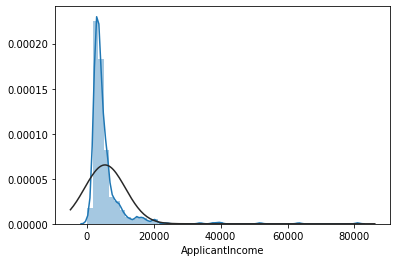

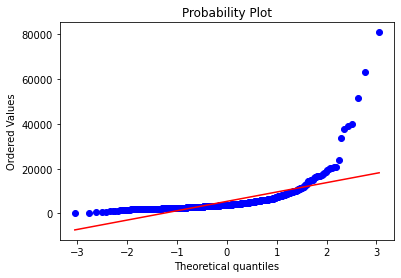

In [9]:
sns.distplot(train_df['ApplicantIncome'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['ApplicantIncome'], plot=plt)

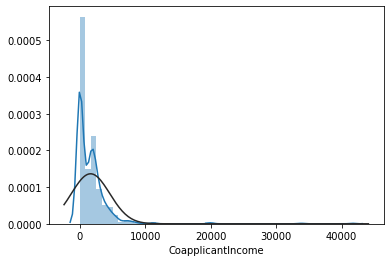

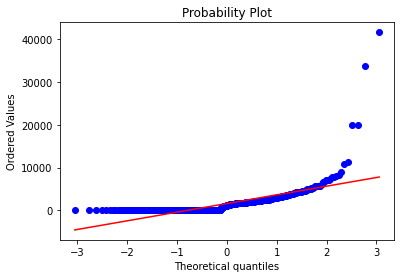

In [10]:
sns.distplot(train_df['CoapplicantIncome'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_df['CoapplicantIncome'], plot=plt)

In [11]:
nonzero_mean = train_df['CoapplicantIncome'][ train_df['CoapplicantIncome'] != 0 ].mean()

In [12]:
train_df['CoapplicantIncome'].loc[ train_df['CoapplicantIncome'] == 0 ] = nonzero_mean

In [13]:
train_df['Dependents'] = train_df['Dependents'].replace(np.nan, 'Unknown', regex=True)
train_df['LoanAmount'].fillna((train_df['LoanAmount'].mean()), inplace=True)

In [14]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0.0,0,Graduate,0.0,5849,2919.193314,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,1.0,1,Graduate,0.0,4583,1508.000000,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,1.0,0,Graduate,1.0,3000,2919.193314,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,1.0,0,Not Graduate,0.0,2583,2358.000000,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,0.0,0,Graduate,0.0,6000,2919.193314,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,1.0,2,Graduate,1.0,5417,4196.000000,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,1.0,0,Not Graduate,0.0,2333,1516.000000,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,1.0,3+,Graduate,0.0,3036,2504.000000,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,1.0,2,Graduate,0.0,4006,1526.000000,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,1.0,1,Graduate,0.0,12841,10968.000000,349.000000,360.0,1.0,Semiurban,N


In [16]:
train_df = train_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [23]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]

,Train,Test
Gender,0,11.0
Dependents,0,10.0
Self_Employed,0,23.0
LoanAmount,0,5.0
Loan_Amount_Term,0,6.0
Credit_History,0,29.0


In [17]:
X=np.zeros((614, 13))
y=np.zeros((614, 1))
X=train_df.iloc[:,0:]
y=train_df['Loan_Status']
X.drop(['Loan_Status'],axis=1,inplace=True)

In [18]:
train_df.shape

(614, 13)

In [19]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,0.0,0,Graduate,0.0,5849,2919.193314,146.412162,360.0,1.0,Urban
1,LP001003,Male,1.0,1,Graduate,0.0,4583,1508.000000,128.000000,360.0,1.0,Rural
2,LP001005,Male,1.0,0,Graduate,1.0,3000,2919.193314,66.000000,360.0,1.0,Urban
3,LP001006,Male,1.0,0,Not Graduate,0.0,2583,2358.000000,120.000000,360.0,1.0,Urban
4,LP001008,Male,0.0,0,Graduate,0.0,6000,2919.193314,141.000000,360.0,1.0,Urban


In [20]:
from sklearn.preprocessing import LabelEncoder
label_x = LabelEncoder()

In [21]:
X.iloc[:,0]=label_x.fit_transform(X.iloc[:,0])
X.iloc[:,1]=label_x.fit_transform(X.iloc[:,1])
X.iloc[:,3]=label_x.fit_transform(X.iloc[:,3])
X.iloc[:,4]=label_x.fit_transform(X.iloc[:,4])
X.iloc[:,9]=label_x.fit_transform(X.iloc[:,9])
X.iloc[:,11]=label_x.fit_transform(X.iloc[:,11])

In [24]:
X.dtypes

Loan_ID                int32
Gender                 int32
Married              float64
Dependents             int32
Education              int32
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History       float64
Property_Area          int32
dtype: object

In [25]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0.0,0,0,0.0,5849,2919.193314,146.412162,8,1.0,2
1,1,1,1.0,1,0,0.0,4583,1508.000000,128.000000,8,1.0,0
2,2,1,1.0,0,0,1.0,3000,2919.193314,66.000000,8,1.0,2
3,3,1,1.0,0,1,0.0,2583,2358.000000,120.000000,8,1.0,2
4,4,1,0.0,0,0,0.0,6000,2919.193314,141.000000,8,1.0,2


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
X_train.shape

(429, 12)

In [27]:
from collections import Counter

def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}

#train = pd.read('train.csv')
class_weights = get_class_weights(y_train)
print(class_weights)

{'N': 2.35, 'Y': 1.0}


In [28]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [29]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [30]:
 #A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [31]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1)

In [32]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=4, cv=skf.split(X,y), scoring = 'accuracy' , verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    1.9s finished



 Time taken: 0 hours 0 minutes and 2.2 seconds.


In [33]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-02.csv', index=False)


 All results:
{'mean_fit_time': array([0.19414711, 0.29520965, 0.25797669, 0.24202164, 0.2649579 ]), 'std_fit_time': array([0.00577752, 0.0050857 , 0.00367212, 0.00261462, 0.00124394]), 'mean_score_time': array([0.00166194, 0.00531896, 0.00465329, 0.00166019, 0.00465353]), 'std_score_time': array([0.00047047, 0.00047064, 0.00046974, 0.00047261, 0.00047025]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dt

In [34]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1.0, verbosity=1)

In [35]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric= 'map' , eval_set=eval_set, verbose=True)

[0]	validation_0-map:0.793212
[1]	validation_0-map:0.800048
[2]	validation_0-map:0.778675
[3]	validation_0-map:0.778675
[4]	validation_0-map:0.778675
[5]	validation_0-map:0.778675
[6]	validation_0-map:0.778675
[7]	validation_0-map:0.778675
[8]	validation_0-map:0.778675
[9]	validation_0-map:0.778675
[10]	validation_0-map:0.778675
[11]	validation_0-map:0.778675
[12]	validation_0-map:0.778675
[13]	validation_0-map:0.778675
[14]	validation_0-map:0.778254
[15]	validation_0-map:0.778254
[16]	validation_0-map:0.778254
[17]	validation_0-map:0.778254
[18]	validation_0-map:0.778254
[19]	validation_0-map:0.778254
[20]	validation_0-map:0.778254
[21]	validation_0-map:0.778254
[22]	validation_0-map:0.778254
[23]	validation_0-map:0.778254
[24]	validation_0-map:0.778254
[25]	validation_0-map:0.778254
[26]	validation_0-map:0.778254
[27]	validation_0-map:0.778254
[28]	validation_0-map:0.778254
[29]	validation_0-map:0.778254
[30]	validation_0-map:0.778254
[31]	validation_0-map:0.778254
[32]	validation_0-

[260]	validation_0-map:0.799761
[261]	validation_0-map:0.799761
[262]	validation_0-map:0.799761
[263]	validation_0-map:0.799761
[264]	validation_0-map:0.799761
[265]	validation_0-map:0.804904
[266]	validation_0-map:0.804904
[267]	validation_0-map:0.804904
[268]	validation_0-map:0.804904
[269]	validation_0-map:0.804904
[270]	validation_0-map:0.804904
[271]	validation_0-map:0.804904
[272]	validation_0-map:0.804904
[273]	validation_0-map:0.804904
[274]	validation_0-map:0.804904
[275]	validation_0-map:0.804904
[276]	validation_0-map:0.804904
[277]	validation_0-map:0.804904
[278]	validation_0-map:0.804904
[279]	validation_0-map:0.804904
[280]	validation_0-map:0.804904
[281]	validation_0-map:0.804904
[282]	validation_0-map:0.804904
[283]	validation_0-map:0.804904
[284]	validation_0-map:0.804904
[285]	validation_0-map:0.804904
[286]	validation_0-map:0.804904
[287]	validation_0-map:0.804904
[288]	validation_0-map:0.804904
[289]	validation_0-map:0.804904
[290]	validation_0-map:0.804904
[291]	va

[517]	validation_0-map:0.805662
[518]	validation_0-map:0.805662
[519]	validation_0-map:0.805662
[520]	validation_0-map:0.805662
[521]	validation_0-map:0.805662
[522]	validation_0-map:0.805662
[523]	validation_0-map:0.805662
[524]	validation_0-map:0.805662
[525]	validation_0-map:0.805662
[526]	validation_0-map:0.805662
[527]	validation_0-map:0.805662
[528]	validation_0-map:0.805662
[529]	validation_0-map:0.805662
[530]	validation_0-map:0.805662
[531]	validation_0-map:0.805662
[532]	validation_0-map:0.805662
[533]	validation_0-map:0.805662
[534]	validation_0-map:0.805662
[535]	validation_0-map:0.805662
[536]	validation_0-map:0.805662
[537]	validation_0-map:0.805662
[538]	validation_0-map:0.805662
[539]	validation_0-map:0.805662
[540]	validation_0-map:0.805662
[541]	validation_0-map:0.805662
[542]	validation_0-map:0.805662
[543]	validation_0-map:0.805662
[544]	validation_0-map:0.805662
[545]	validation_0-map:0.805662
[546]	validation_0-map:0.805662
[547]	validation_0-map:0.805662
[548]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1.0, verbosity=1)

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.93      0.41      0.57        64
           Y       0.76      0.98      0.86       121

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.82      0.78      0.76       185



In [39]:
test_df['Married'] = test_df['Married'].replace({'No': 0, 'Yes': 1})
test_df['Self_Employed'] = test_df['Self_Employed'].replace({'No': 0, 'Yes': 1})

nonzero_mean = test_df['CoapplicantIncome'][ test_df['CoapplicantIncome'] != 0 ].mean()
test_df['CoapplicantIncome'].loc[ test_df['CoapplicantIncome'] == 0 ] = nonzero_mean

test_df['Dependents'] = test_df['Dependents'].replace(np.nan, 'Unknown', regex=True)
test_df['LoanAmount'].fillna((test_df['LoanAmount'].mean()), inplace=True)

test_df = test_df.apply(lambda x:x.fillna(x.value_counts().index[0]))

test_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,1,0,Graduate,0.0,5720,2730.023697,110.0,360.0,1.0,Urban
1,LP001022,Male,1,1,Graduate,0.0,3076,1500.000000,126.0,360.0,1.0,Urban
2,LP001031,Male,1,2,Graduate,0.0,5000,1800.000000,208.0,360.0,1.0,Urban
3,LP001035,Male,1,2,Graduate,0.0,2340,2546.000000,100.0,360.0,1.0,Urban
4,LP001051,Male,0,0,Not Graduate,0.0,3276,2730.023697,78.0,360.0,1.0,Urban
5,LP001054,Male,1,0,Not Graduate,1.0,2165,3422.000000,152.0,360.0,1.0,Urban
6,LP001055,Female,0,1,Not Graduate,0.0,2226,2730.023697,59.0,360.0,1.0,Semiurban
7,LP001056,Male,1,2,Not Graduate,0.0,3881,2730.023697,147.0,360.0,0.0,Rural
8,LP001059,Male,1,2,Graduate,0.0,13633,2730.023697,280.0,240.0,1.0,Urban
9,LP001067,Male,0,0,Not Graduate,0.0,2400,2400.000000,123.0,360.0,1.0,Semiurban


In [40]:
test_df.shape

(367, 12)

In [46]:
XT=np.zeros((367, 12))
XT=test_df.iloc[:,0:]
Loan_ID_Stored =test_df['Loan_ID']

In [47]:
Loan_ID_Stored

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [48]:
XT.iloc[:,0]=label_x.fit_transform(XT.iloc[:,0])
XT.iloc[:,1]=label_x.fit_transform(XT.iloc[:,1])
XT.iloc[:,3]=label_x.fit_transform(XT.iloc[:,3])
XT.iloc[:,4]=label_x.fit_transform(XT.iloc[:,4])
XT.iloc[:,9]=label_x.fit_transform(XT.iloc[:,9])
XT.iloc[:,11]=label_x.fit_transform(XT.iloc[:,11])

In [49]:
model.fit(X,y)
yt_pred = model.predict(XT)

In [50]:
submission = pd.DataFrame({ "Loan_ID": Loan_ID_Stored,
                            "Loan_Status": yt_pred })
submission.to_csv('submission_1_XGB.csv', index=False)